# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `11`
* Students: `Hajri, Mortiniera, Gomez, Wagner`
* Dataset: `FMA free music archive`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
import numpy as np

In [2]:
adjacency = np.load("./symmetrized_matrix08.npy")
n_nodes =  adjacency.shape[0]
n_edges =  np.count_nonzero(adjacency)
n_edges = int(n_edges/2) #to get undirected graph edge number

In [3]:
print(n_nodes, n_edges)

2204 28637


## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [4]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [5]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    k = 0
    l = 0 
    i = 0
    j = 0
    random.seed(seed)
    A = np.zeros((n,n))
    for k in range(n):
        for l in range(k,n):
            A[k,l]=random.uniform(0, 1)
            A[l,k]=A[i,j]
            
    for i in range(n):
        for j in range(i, n):
            if(A[i,j] <= p):
                A[i,j] = 1
                A[j,i] = 1
            else : 
                A[i,j] = 0
                A[j,i] = 0
    
    return A

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

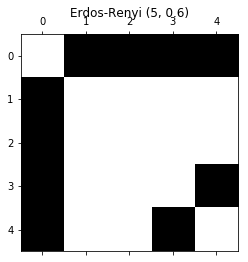

In [6]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

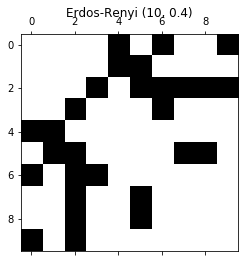

In [7]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [8]:
# Your code here.
p = (2*n_edges)/(n_nodes*(n_nodes+1))
ER = erdos_renyi(n_nodes,p)

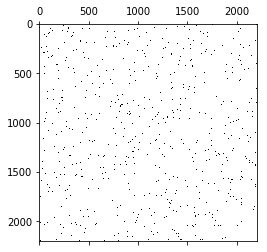

In [9]:
plt.spy(ER)

**Your answer here.**
We know that the expected number of links in a G(n,p) network is : <L> = p*(n*(n+1)/2). So by replacing <L> by the number of edges of our network and taking the resulting p, we can create a random graph that approximate our network.

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [10]:
def barabasi_albert(n, m, m0=2, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    m0: int (optional)
        Number of nodes for the inital connected network.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    if(m0<m) : m0=m
    
    adjacency = np.zeros([n,n])
    #set initial set edges arbitrarily
    for i in range(0,m0):
        #ensure connectivity
        adjacency[i][(i+1)%m0]=1
        adjacency[(i+1)%m0][i]=1
        random.seed(seed)
        node = np.floor(random.random()*m0)
        while(node==i): node = np.floor(random.random()*m0)
        adjacency[i][int(node)%m0]=1
        adjacency[int(node)%m0][i]=1
        
    #add edges for every new node following the model
        
    for i in range(m0,n):
        degrees_cumul = np.zeros(i)
        degrees_cumul[0] = (np.count_nonzero(adjacency[0]))
        for j in range(1,i):
            degrees_cumul[j] = (np.count_nonzero(adjacency[j]))+(degrees_cumul[j-1])
        current_m = 0
        
        random.seed(seed)
        rand = [random.random() for _ in range(m)]
        rand = (np.dot(rand,int(degrees_cumul[len(degrees_cumul)-1])))
        
        for j in rand:
            if(j<=degrees_cumul[0] and (adjacency[i][0] == 1 or adjacency[0][i] == 1 )):
                a = int(np.floor(random.random()*i))
                while(adjacency[i][a]==1 or adjacency[a][i]==1):
                    a = int(np.floor(random.random()*i))
                adjacency[i][a] = 1
                adjacency[a][i] = 1
            elif(j<=degrees_cumul[0]):
                adjacency[i][0] = 1
                adjacency[0][i] = 1
            for k in range(1,len(degrees_cumul)):
                if(j>degrees_cumul[k-1] and j<=degrees_cumul[k] and (adjacency[i][k] == 1 or adjacency[k][i]==1)):
                    a = int(np.floor(random.random()*i))
                    while(adjacency[i][a]==1 or adjacency[a][i]==1):
                        a = int(np.floor(random.random()*i))
                    adjacency[i][a] = 1
                    adjacency[a][i] = 1
                    break
                elif(j>degrees_cumul[k-1] and j<=degrees_cumul[k]):
                    adjacency[i][k] = 1
                    adjacency[k][i] = 1
                    break
    return adjacency

Text(0.5, 1.05, 'Barabasi-Albert (5, 1)')

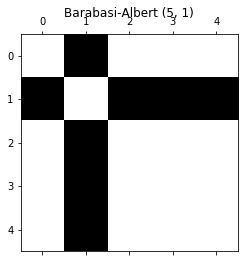

In [11]:
ba = barabasi_albert(5, 1, 2, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5, 1.05, 'Barabasi-Albert (10, 2)')

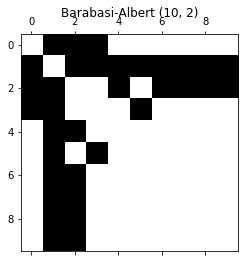

In [12]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

28506.0  edges


Text(0.5, 1.05, 'Barabasi-Albert (2204, 13, 2)')

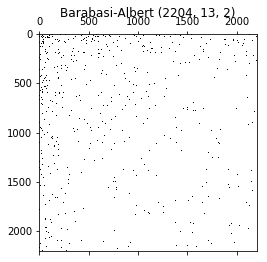

In [13]:
# Your code here.
#we need to have m0 > m
ba = barabasi_albert(n_nodes, 13, 2)
n_edges_ba = np.count_nonzero(ba)
print(n_edges_ba/2,' edges')
plt.spy(ba)
plt.title('Barabasi-Albert (2204, 13, 2)')

2204

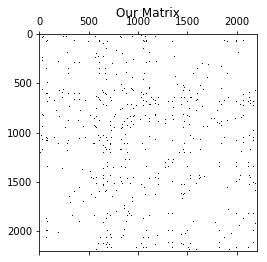

In [14]:
plt.spy(adjacency)
plt.title('Our Matrix')
n_nodes

**Your answer here**
The network has N = t+m0 nodes and m*t+m0 edges. Hence w choose m0 = 2 and m = 13 as (2204-2)*13+2 = 28628 edges as in our network.

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [18]:
print('number of edges for : barabasi = {}, erdos-renyi = {}, our network = {}'.format(int(ba.sum()/2), int(ER.sum()/2), n_edges))

number of edges for : barabasi = 28506, erdos-renyi = 28666, our network = 28637


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [19]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    
    # Your code here.
    kl = 0
    for i in range(len(p)) :
        if(p[i] != 0) :
            if(q[i] != 0) :
                kl += p[i]*np.log(p[i]/q[i])
    
    return kl

In [20]:
p_test = np.array([0.2, 0.2, 0.2, 0.4, 0, 0.7, 0])
q_test = np.array([0.3, 0.3, 0.1, 0.3, 0.5, 0, 0])
kl_divergence(p_test, q_test)

0.09151622184943575

### Question 7: 

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence.

**Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

**Hint:** Make sure none of the graphs have disconnected nodes, as KL divergence will not be defined in that case. If that happens with one of the randomly generated networks, you can regenerate it and keep the seed that gives you no disconnected nodes.

In [21]:
# Your code here.
def create_degree_distribution(p): # we only work with connected graphs here
    dist = np.zeros(len(p))
    for i in range(len(p)):
        #deg = int(np.sum(p[i]))
        deg = int(np.sum(p[i])) - 1
        if deg == 0: #if we have a disconnected vertice we abort
            print("a vertice is disconnected --> error")
            return -1
        #dist[deg-1] += 1
        dist[i] = deg
    return dist
def degree_to_plot(p): #the degree for each vertice
    degree = []
    for i in p:
        degree.append(np.sum(i))
    return degree

In [22]:
def compare_degree_distrib(p, q): #matrice a and matrice b need to have the same size
    #kl divergence is defined everywhere if p[i] =0 when q[i]=0, otherwise it is not defined
    if p.shape != q.shape:
        print('different shape graph')
        return -1
    p_distrib = create_degree_distribution(p)
    q_distrib = create_degree_distribution(q)
    p_distrib = p_distrib/np.sum(p_distrib)
    q_distrib = q_distrib/np.sum(q_distrib)
    print(np.sum(q_distrib))
    
    return kl_divergence(p_distrib, q_distrib)

In [24]:
compare_degree_distrib(ba, ER)

1.0


0.29269206590492974

### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

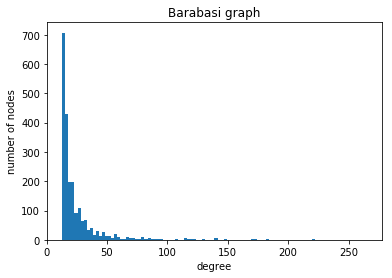

In [44]:
# Your code here.
plt.hist(degree_to_plot(ba), bins=100)
plt.title('Barabasi graph')
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.show()

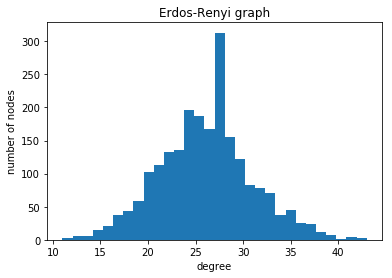

In [45]:
plt.hist(degree_to_plot(ER), bins=30)
plt.title('Erdos-Renyi graph')
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.show()

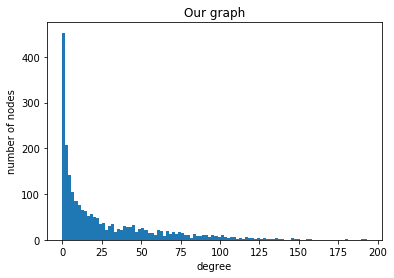

In [46]:
plt.hist(degree_to_plot(adjacency), bins=100)
plt.title('Our graph')
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.show()

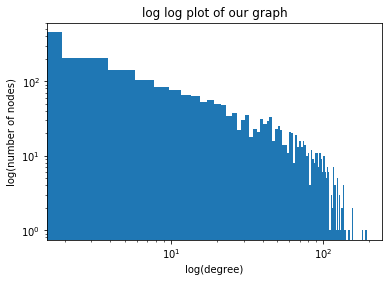

In [47]:
plt.hist(degree_to_plot(adjacency), bins=100)
plt.title('log log plot of our graph')
plt.xlabel('log(degree)')
plt.ylabel('log(number of nodes)')
plt.loglog()
plt.show()

**Your answer here.**

We can see when looking at above plots, that the degree distribution of Barasi and Erdos-Renyi models are very differents, which was expected since the KL-divergence gave us a result around 27% of difference.

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

No, two random graphs that have the same degree distribution are iid. Then, this doesn't necesserly imply that the two graphs are the same, since they are indenpendant.

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

In [38]:
import networkx as nx

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

The degree distribution of our graph seems to follow one of a powerlaw distribution according to the two above plots, which is asymptotic to scale free networks.
Hence, we choose to generate our network from networkX using a powerlaw graph generator.

In [40]:
PW = nx.powerlaw_cluster_graph(2204, 13, 0.8, seed=9764)
adj_PW = nx.adjacency_matrix(PW)
print('number of edges = {}'.format(int(np.sum(adj_PW)/2)))

number of edges = 28412


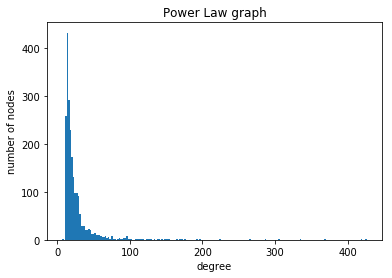

In [48]:
plt.hist(degree_to_plot(adj_PW), bins=200)
plt.title('Power Law graph')
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.show()

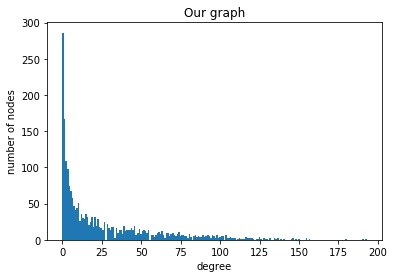

In [49]:
plt.hist(degree_to_plot(adjacency), bins=200)
plt.title('Our graph')
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.show()

As we can see, after plotting the two degree distributions (from our network and the one generated by networkX), 
it seems to be a good choice to choose the powerlaw.

### Question 11

Explain (in short) how the chosen model works.

This model works as the same scheme with Scale-free network using preferential attachment, where the degree distribution and the clustering degree distribution follows a power-law.

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [50]:
# Your code here.
nodes = 2204
random_graph_G = nx.powerlaw_cluster_graph(nodes, 13, 0.8, seed=9764)
random_graph = nx.adjacency_matrix(random_graph_G)
print('the number of nodes is {}, and the number of edges is {}'.format(nodes, int(np.sum(random_graph)/2)))

the number of nodes is 2204, and the number of edges is 28412


### Question 13

Check the properties you expected to be similar, and compare to your network.

As stated above, our common property is the degree distribution.

Are the results what you expected? Explain.

**Your answer here.**

We expected some of the results but not all. It is perfectly fine for the degree distribution, however, we wanted to use the KL-divergence of a measure of similarity between our generated graph with networkX and the original one, but we have disconnected nodes. But if we change the original model threshold to avoid disconnected nodes, we would add too much noise in the graph and we ended up with a linear degree distribution for which no known model was a good fit.